In [1]:
pip install nfl-data-py

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nfl_data_py as nfl

In [3]:
team_labels= rost["team"].unique()
team_labels

NameError: name 'rost' is not defined

Team Roster Stuff

In [ ]:
import pandas as pd
def team_WR_list(tm = "KC"):
    rost= nfl.import_seasonal_rosters([2019, 2020, 2021, 2022, 2023, 2024])
    tm = rost[rost["team"] == tm]
    tm_WR = tm[tm["position"] == "WR"]
    return tm_WR[["player_name", "position", "team", "birth_date"]]

team_WR_list(tm = "KC")

>rost= nfl.import_seasonal_rosters([2024])
KC = rost[rost["team"] == "KC"]
KC_WR = KC[KC["position"] == "WR"]
KC_WR[["player_name", "position", "team", "birth_date"]]

In [ ]:
def all_WR_list():
    rost= nfl.import_seasonal_rosters([2019, 2020, 2021, 2022, 2023, 2024])
    rost_WR = rost[rost["position"] == "WR"]
    return rost_WR[["player_name", "position", "team", "birth_date"]]
all_WR_list()

Weekly Data

>weekly_data = nfl.import_weekly_data([2024])
weekly_WR_data = weekly_data[weekly_data["position"] == "WR"]
KC_player_weekly = weekly_WR_data[weekly_WR_data["recent_team"] == "KC"]
XW = KC_player_weekly[KC_player_weekly["player_display_name"] == "Xavier Worthy"]
XW[["player_id", "player_display_name", "receiving_first_downs", "receiving_epa", "target_share", "air_yards_share"]]

In [253]:
season=nfl.import_seasonal_data([2024])
#WRRR= season[season["position"] == "WR"]
season

,player_id,season,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh
0,00-0023459,2024,REG,368,584,3897.0,28,11.0,40.0,302.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.177032
1,00-0024243,2024,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.006757,0.059271,0.008850,0.00,0.071429,0.055556,0.004425,0.007080,0.068966,0.010541
2,00-0026158,2024,REG,162,248,1761.0,12,7.0,18.0,123.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.156155
3,00-0026300,2024,REG,2,3,17.0,0,0.0,1.0,5.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001842
4,00-0026498,2024,REG,340,517,3762.0,20,8.0,28.0,213.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.164457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,00-0039917,2024,REG,61,105,775.0,3,3.0,4.0,14.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.107378
603,00-0039918,2024,REG,351,562,3541.0,20,6.0,68.0,466.0,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.196150
604,00-0039919,2024,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.134861,0.514337,0.206644,0.15,0.215116,0.208333,0.178322,0.195315,1.296820,0.111661
605,00-0039920,2024,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.009346,0.094505,0.017641,0.00,0.020408,0.017241,0.008820,0.014112,0.096970,0.018849


WR Lists with Calculated Variables

In [ ]:
season_2019= nfl.import_seasonal_pfr("rec",[2019]) #get 2019 data
WRs_2019 = season_2019[season_2019["pos"] == "WR"] #sort by wide recievers
WRs_2019 = WRs_2019[WRs_2019["tm"] != "2TM"]  
WRs_2019 = WRs_2019[WRs_2019["tm"] != "3TM"] # exlude all players who got traded
WRs_2019 = WRs_2019[WRs_2019["tm"] != "4TM"] 
WRs_2019["rec_share"] = WRs_2019.groupby("tm")['rec'].transform(lambda x:x/x.sum()*100)
WRs_2019["tgt_share"] = WRs_2019.groupby("tm")['tgt'].transform(lambda x:x/x.sum()*100) #calculate our key variables
WRs_2019["td_share"] = WRs_2019.groupby("tm")['td'].transform(lambda x:x/x.sum()*100)
WRs_2019["yds_share"] = WRs_2019.groupby("tm")['yds'].transform(lambda x:x/x.sum()*100)
#WRs_2019[["player","tm", "rec_share", "tgt_share", "td_share", "yds_share"]].sort_values(by="tm")

#KC_WRs_2019 = WRs_2019[WRs_2019["tm"] == "KC"]
#KC_WRs_2019[["player","tm", "rec_share", "tgt_share", "td_share", "yds_share"]] # check math

In [ ]:
season_2020= nfl.import_seasonal_pfr("rec",[2020]) #get 2020 data
WRs_2020 = season_2020[season_2020["pos"] == "WR"] #sort by wide recievers
WRs_2020 = WRs_2020[WRs_2020["tm"] != "2TM"]  
WRs_2020 = WRs_2020[WRs_2020["tm"] != "3TM"] # exlude all players who got traded
WRs_2020 = WRs_2020[WRs_2020["tm"] != "4TM"] 
WRs_2020["rec_share"] = WRs_2020.groupby("tm")['rec'].transform(lambda x:x/x.sum()*100)
WRs_2020["tgt_share"] = WRs_2020.groupby("tm")['tgt'].transform(lambda x:x/x.sum()*100) #calculate our key variables
WRs_2020["td_share"] = WRs_2020.groupby("tm")['td'].transform(lambda x:x/x.sum()*100)
WRs_2020["yds_share"] = WRs_2020.groupby("tm")['yds'].transform(lambda x:x/x.sum()*100)
#WRs_2020[["player","tm", "rec_share", "tgt_share", "td_share", "yds_share"]].sort_values(by="tm")

In [ ]:
season_2021= nfl.import_seasonal_pfr("rec",[2021]) #get 2021 data
WRs_2021 = season_2021[season_2021["pos"] == "WR"] #sort by wide recievers
WRs_2021 = WRs_2021[WRs_2021["tm"] != "2TM"]  
WRs_2021 = WRs_2021[WRs_2021["tm"] != "3TM"] # exlude all players who got traded
WRs_2021 = WRs_2021[WRs_2021["tm"] != "4TM"] 
WRs_2021["rec_share"] = WRs_2021.groupby("tm")['rec'].transform(lambda x:x/x.sum()*100)
WRs_2021["tgt_share"] = WRs_2021.groupby("tm")['tgt'].transform(lambda x:x/x.sum()*100) #calculate our key variables
WRs_2021["td_share"] = WRs_2021.groupby("tm")['td'].transform(lambda x:x/x.sum()*100)
WRs_2021["yds_share"] = WRs_2021.groupby("tm")['yds'].transform(lambda x:x/x.sum()*100)
#WRs_2021[["player","tm", "rec_share", "tgt_share", "td_share", "yds_share"]].sort_values(by="tm")

In [ ]:
season_2022= nfl.import_seasonal_pfr("rec",[2022]) #get 2022 data
WRs_2022 = season_2022[season_2022["pos"] == "WR"] #sort by wide recievers
WRs_2022 = WRs_2022[WRs_2022["tm"] != "2TM"]  
WRs_2022 = WRs_2022[WRs_2022["tm"] != "3TM"] # exlude all players who got traded
WRs_2022 = WRs_2022[WRs_2022["tm"] != "4TM"] 
WRs_2022["rec_share"] = WRs_2022.groupby("tm")['rec'].transform(lambda x:x/x.sum()*100)
WRs_2022["tgt_share"] = WRs_2022.groupby("tm")['tgt'].transform(lambda x:x/x.sum()*100) #calculate our key variables
WRs_2022["td_share"] = WRs_2022.groupby("tm")['td'].transform(lambda x:x/x.sum()*100)
WRs_2022["yds_share"] = WRs_2022.groupby("tm")['yds'].transform(lambda x:x/x.sum()*100)
#WRs_2022[["player","tm", "rec_share", "tgt_share", "td_share", "yds_share"]].sort_values(by="tm")

In [ ]:
season_2023= nfl.import_seasonal_pfr("rec",[2023]) #get 2023 data
WRs_2023 = season_2023[season_2023["pos"] == "WR"] #sort by wide recievers
WRs_2023 = WRs_2023[WRs_2023["tm"] != "2TM"]  
WRs_2023 = WRs_2023[WRs_2023["tm"] != "3TM"] # exlude all players who got traded
WRs_2023 = WRs_2023[WRs_2023["tm"] != "4TM"] 
WRs_2023["rec_share"] = WRs_2023.groupby("tm")['rec'].transform(lambda x:x/x.sum()*100)
WRs_2023["tgt_share"] = WRs_2023.groupby("tm")['tgt'].transform(lambda x:x/x.sum()*100) #calculate our key variables
WRs_2023["td_share"] = WRs_2023.groupby("tm")['td'].transform(lambda x:x/x.sum()*100)
WRs_2023["yds_share"] = WRs_2023.groupby("tm")['yds'].transform(lambda x:x/x.sum()*100)
#WRs_2023[["player","tm", "rec_share", "tgt_share", "td_share", "yds_share"]].sort_values(by="tm")

In [ ]:
season_2024= nfl.import_seasonal_pfr("rec",[2024]) #get 2024 data
WRs_2024 = season_2024[season_2024["pos"] == "WR"] #sort by wide recievers
WRs_2024 = WRs_2024[WRs_2024["tm"] != "2TM"]  
WRs_2024 = WRs_2024[WRs_2024["tm"] != "3TM"] # exlude all players who got traded
WRs_2024 = WRs_2024[WRs_2024["tm"] != "4TM"] 
WRs_2024["rec_share"] = WRs_2024.groupby("tm")['rec'].transform(lambda x:x/x.sum()*100)
WRs_2024["tgt_share"] = WRs_2024.groupby("tm")['tgt'].transform(lambda x:x/x.sum()*100) #calculate our key variables
WRs_2024["td_share"] = WRs_2024.groupby("tm")['td'].transform(lambda x:x/x.sum()*100)
WRs_2024["yds_share"] = WRs_2024.groupby("tm")['yds'].transform(lambda x:x/x.sum()*100)
#WRs_2023[["player","tm", "rec_share", "tgt_share", "td_share", "yds_share"]].sort_values(by="tm")

In [ ]:
WRs_all = pd.concat([WRs_2019, WRs_2020, WRs_2021, WRs_2022, WRs_2023, WRs_2024], ignore_index=True)

In [ ]:
WRs_all[["season", "player", "tm", "pos", "rec_share", "tgt_share", "td_share", "yds_share"]].sort_values(by=["season", "tm"])

Testing

In [ ]:
def team_year_WRs(tm = "KC", year= 2019):
    season= nfl.import_seasonal_pfr("rec",[year]) #get year data
    WRs_year = season[season["pos"] == "WR"] #sort by wide reciever

    
    tm_yr_WRs = WRs_year[WRs_year["tm"] == tm]
    tm_yr_WRs['rec_share']= tm_yr_WRs['rec']/tm_yr_WRs["rec"].sum() * 100
    return tm_yr_WRs[["player","tm", "tgt", "rec", "yds", "td", "rec_share"]]

team_year_WRs(tm = "KC", year= 2019)

In [ ]:
season= nfl.import_seasonal_pfr("rec",[2019])
WRs_2019 = season[season["pos"] == "WR"]
KC_2019_WRs = WRs[WRs["tm"] == "KC"]
KC_2019_WRs[["player", "tgt", "rec", "yds", "td"]]

Trying to reduce quarterbacks

In [57]:
def get_player_list(position):
    rost = nfl.import_seasonal_rosters([2019, 2020, 2021, 2022, 2023, 2024])
    filtered = rost[rost["position"] == position]
    return filtered[["season","player_name", "position", "team", "birth_date"]]

In [45]:
rost= nfl.import_seasonal_rosters([2019, 2020, 2021, 2022, 2023, 2024])
team_labels= rost["team"].unique()
team_labels

array(['IND', 'NE', 'NO', 'ATL', 'PHI', 'DAL', 'KC', 'HOU', 'DET', 'NYG',
       'ARI', 'PIT', 'LAC', 'MIA', 'SF', 'BUF', 'TEN', 'WAS', 'GB', 'OAK',
       'LA', 'BAL', 'SEA', 'CAR', 'CLE', 'NYJ', 'CIN', 'DEN', 'JAX',
       'MIN', 'CHI', 'TB', 'LV'], dtype=object)

In [115]:
QB= get_player_list("QB")

def keep_1_QB(QB, sea=2019, tm="PHI", name="Carson Wentz"):
    QB = QB[~((QB["season"] == sea) & (QB["team"] == tm) & (QB["player_name"] != name))]
    return QB

# Test the function with different seasons, without creating new datasets
QB = keep_1_QB(QB, sea=2019, tm="PHI", name="Carson Wentz")  # For 2019 season
QB = keep_1_QB(QB, sea=2020, tm="PHI", name="Carson Wentz")  # For 2020 season

QB[QB["team"] == "PHI"] # test

,season,player_name,position,team,birth_date
1265,2019,Carson Wentz,QB,PHI,1992-12-30
4202,2020,Carson Wentz,QB,PHI,1992-12-30
7899,2021,Gardner Minshew,QB,PHI,1996-05-16
8311,2021,Reid Sinnett,QB,PHI,1997-02-05
8585,2021,Jalen Hurts,QB,PHI,1998-08-07
10505,2022,Gardner Minshew,QB,PHI,1996-05-16
11086,2022,Jalen Hurts,QB,PHI,1998-08-07
11464,2022,Ian Book,QB,PHI,1998-03-30
12566,2023,Marcus Mariota,QB,PHI,1993-10-30
13779,2023,Jalen Hurts,QB,PHI,1998-08-07


In [247]:
QB= get_player_list("QB")
#Raiders
QB = keep_1_QB(QB, sea=2019, tm="OAK", name="Derek Carr")  # For 2019 season
QB = keep_1_QB(QB, sea=2020, tm="LV", name="Derek Carr")  # For 2020 season
QB = keep_1_QB(QB, sea=2021, tm="LV", name="Derek Carr")  # For 2019 season
QB = keep_1_QB(QB, sea=2022, tm="LV", name="Derek Carr")  # For 2020 season
QB = keep_1_QB(QB, sea=2023, tm="LV", name="Aidan O'Connell")  # For 2019 season
QB = keep_1_QB(QB, sea=2024, tm="LV", name="Gardner Minshew")  # For 2020 season
QB[QB["team"] == "LV"] #check

#Eagles
QB = keep_1_QB(QB, sea=2019, tm="PHI", name="Carson Wentz")  
QB = keep_1_QB(QB, sea=2020, tm="PHI", name="Carson Wentz")  
QB = keep_1_QB(QB, sea=2021, tm="PHI", name="Jalen Hurts")  
QB = keep_1_QB(QB, sea=2022, tm="PHI", name="Jalen Hurts")  
QB = keep_1_QB(QB, sea=2023, tm="PHI", name="Jalen Hurts")  
QB = keep_1_QB(QB, sea=2024, tm="PHI", name="Jalen Hurts")  
QB[QB["team"] == "PHI"] #check

#Commanders
QB[QB["team"] == "WAS"] 
QB = keep_1_QB(QB, sea=2019, tm="WAS", name="Case Keenum")  
QB = keep_1_QB(QB, sea=2020, tm="WAS", name="Alex Smith") 
QB = keep_1_QB(QB, sea=2021, tm="WAS", name="Taylor Heinicke")  
QB = keep_1_QB(QB, sea=2022, tm="WAS", name="Carson Wentz")  
QB = keep_1_QB(QB, sea=2023, tm="WAS", name="Sam Howell")  
QB = keep_1_QB(QB, sea=2024, tm="WAS", name="Jayden Daniels")
QB[QB["team"] == "WAS"] #check

#Cowboys
QB[QB["team"] == "DAL"] 
QB = keep_1_QB(QB, sea=2019, tm="DAL", name="Dak Prescott")  
QB = keep_1_QB(QB, sea=2020, tm="DAL", name="Andy Dalton") 
QB = keep_1_QB(QB, sea=2021, tm="DAL", name="Dak Prescott")  
QB = keep_1_QB(QB, sea=2022, tm="DAL", name="Dak Prescott")  
QB = keep_1_QB(QB, sea=2023, tm="DAL", name="Dak Prescott")  
QB = keep_1_QB(QB, sea=2024, tm="DAL", name="Cooper Rush")
QB[QB["team"] == "DAL"] #check

#Giants
QB[QB["team"] == "NYG"] 
QB = keep_1_QB(QB, sea=2019, tm="NYG", name="Daniel Jones") 
QB = keep_1_QB(QB, sea=2020, tm="NYG", name="Daniel Jones") 
QB = keep_1_QB(QB, sea=2021, tm="NYG", name="Daniel Jones")  
QB = keep_1_QB(QB, sea=2022, tm="NYG", name="Daniel Jones")  
QB = keep_1_QB(QB, sea=2023, tm="NYG", name="Tommy DeVito")  
QB = keep_1_QB(QB, sea=2024, tm="NYG", name="Daniel Jones")
QB[QB["team"] == "NYG"] #check

#Buccaneers
QB[QB["team"] == "TB"]
QB = keep_1_QB(QB, sea=2019, tm="TB", name="Jameis Winston") 
QB = keep_1_QB(QB, sea=2020, tm="TB", name="Tom Brady") 
QB = keep_1_QB(QB, sea=2021, tm="TB", name="Tom Brady")  
QB = keep_1_QB(QB, sea=2022, tm="TB", name="Tom Brady")  
QB = keep_1_QB(QB, sea=2023, tm="TB", name="Baker Mayfield")  
QB = keep_1_QB(QB, sea=2024, tm="TB", name="Baker Mayfield")
QB[QB["team"] == "TB"] #check

#Falcons
QB[QB["team"] == "ATL"]
QB = keep_1_QB(QB, sea=2019, tm="ATL", name="Matt Ryan") 
QB = keep_1_QB(QB, sea=2020, tm="ATL", name="Matt Ryan") 
QB = keep_1_QB(QB, sea=2021, tm="ATL", name="Matt Ryan")  
QB = keep_1_QB(QB, sea=2022, tm="ATL", name="Marcus Mariota")  
QB = keep_1_QB(QB, sea=2023, tm="ATL", name="Desmond Ridder")  
QB = keep_1_QB(QB, sea=2024, tm="ATL", name="Kirk Cousins")
QB[QB["team"] == "ATL"] #check

#Panthers
QB[QB["team"] == "CAR"]
QB = keep_1_QB(QB, sea=2019, tm="CAR", name="Kyle Allen") 
QB = keep_1_QB(QB, sea=2020, tm="CAR", name="Teddy Bridgewater") 
QB = keep_1_QB(QB, sea=2021, tm="CAR", name="Sam Darnold")  
QB = keep_1_QB(QB, sea=2022, tm="CAR", name="Sam Darnold")  
QB = keep_1_QB(QB, sea=2023, tm="CAR", name="Bryce Young")  
QB = keep_1_QB(QB, sea=2024, tm="CAR", name="Bryce Young")
QB[QB["team"] == "CAR"] #check

#SAINTS
QB[QB["team"] == "NO"]
QB = keep_1_QB(QB, sea=2019, tm="NO", name="Drew Brees") 
QB = keep_1_QB(QB, sea=2020, tm="NO", name="Drew Brees") 
QB = keep_1_QB(QB, sea=2021, tm="NO", name="Trevor Siemian")  
QB = keep_1_QB(QB, sea=2022, tm="NO", name="Andy Dalton")  
QB = keep_1_QB(QB, sea=2023, tm="NO", name="Derek Carr")  
QB = keep_1_QB(QB, sea=2024, tm="NO", name="Derek Carr")
QB[QB["team"] == "NO"] #check

#Lions
QB[QB["team"] == "DET"]
QB = keep_1_QB(QB, sea=2019, tm="DET", name="Matthew Stafford") 
QB = keep_1_QB(QB, sea=2020, tm="DET", name="Matthew Stafford") 
QB = keep_1_QB(QB, sea=2021, tm="DET", name="Jared Goff")  
QB = keep_1_QB(QB, sea=2022, tm="DET", name="Jared Goff")  
QB = keep_1_QB(QB, sea=2023, tm="DET", name="Jared Goff")  
QB = keep_1_QB(QB, sea=2024, tm="DET", name="Jared Goff")
QB[QB["team"] == "DET"] #check

#Vikings
QB[QB["team"] == "MIN"]
QB = keep_1_QB(QB, sea=2019, tm="MIN", name="Kirk Cousins") 
QB = keep_1_QB(QB, sea=2020, tm="MIN", name="Kirk Cousins") 
QB = keep_1_QB(QB, sea=2021, tm="MIN", name="Kirk Cousins")  
QB = keep_1_QB(QB, sea=2022, tm="MIN", name="Kirk Cousins")  
QB = keep_1_QB(QB, sea=2023, tm="MIN", name="Kirk Cousins")  
QB = keep_1_QB(QB, sea=2024, tm="MIN", name="Sam Darnold")
QB[QB["team"] == "MIN"] #check

#Packers
QB[QB["team"] == "GB"]
QB = keep_1_QB(QB, sea=2019, tm="GB", name="Aaron Rodgers") 
QB = keep_1_QB(QB, sea=2020, tm="GB", name="Aaron Rodgers") 
QB = keep_1_QB(QB, sea=2021, tm="GB", name="Aaron Rodgers")  
QB = keep_1_QB(QB, sea=2022, tm="GB", name="Aaron Rodgers")  
QB = keep_1_QB(QB, sea=2023, tm="GB", name="Jordan Love")  
QB = keep_1_QB(QB, sea=2024, tm="GB", name="Jordan Love")
QB[QB["team"] == "GB"] #check

#Bears
QB[QB["team"] == "CHI"]
QB = keep_1_QB(QB, sea=2019, tm="CHI", name="Mitchell Trubisky") 
QB = keep_1_QB(QB, sea=2020, tm="CHI", name="Nick Foles") 
QB = keep_1_QB(QB, sea=2021, tm="CHI", name="Justin Fields")  
QB = keep_1_QB(QB, sea=2022, tm="CHI", name="Justin Fields")  
QB = keep_1_QB(QB, sea=2023, tm="CHI", name="Justin Fields")  
QB = keep_1_QB(QB, sea=2024, tm="CHI", name="Caleb Williams")
QB[QB["team"] == "CHI"] #check

#Rams
QB[QB["team"] == "LA"]
QB = keep_1_QB(QB, sea=2019, tm="LA", name="Jared Goff") 
QB = keep_1_QB(QB, sea=2020, tm="LA", name="Jared Goff") 
QB = keep_1_QB(QB, sea=2021, tm="LA", name="Matthew Stafford")  
QB = keep_1_QB(QB, sea=2022, tm="LA", name="Matthew Stafford")  
QB = keep_1_QB(QB, sea=2023, tm="LA", name="Matthew Stafford")  
QB = keep_1_QB(QB, sea=2024, tm="LA", name="Matthew Stafford")
QB[QB["team"] == "LA"] #check

#Seahawks
QB[QB["team"] == "SEA"]
QB = keep_1_QB(QB, sea=2019, tm="SEA", name="Russell Wilson") 
QB = keep_1_QB(QB, sea=2020, tm="SEA", name="Russell Wilson") 
QB = keep_1_QB(QB, sea=2021, tm="SEA", name="Russell Wilson")  
QB = keep_1_QB(QB, sea=2022, tm="SEA", name="Geno Smith")  
QB = keep_1_QB(QB, sea=2023, tm="SEA", name="Geno Smith")  
QB = keep_1_QB(QB, sea=2024, tm="SEA", name="Geno Smith")
QB[QB["team"] == "SEA"] #check

#Cardinals
QB[QB["team"] == "ARI"]
QB = keep_1_QB(QB, sea=2019, tm="ARI", name="Kyler Murray") 
QB = keep_1_QB(QB, sea=2020, tm="ARI", name="Kyler Murray") 
QB = keep_1_QB(QB, sea=2021, tm="ARI", name="Kyler Murray")  
QB = keep_1_QB(QB, sea=2022, tm="ARI", name="Kyler Murray")  
QB = keep_1_QB(QB, sea=2023, tm="ARI", name="Kyler Murray")  
QB = keep_1_QB(QB, sea=2024, tm="ARI", name="Kyler Murray")
QB[QB["team"] == "ARI"] #check

#Bills
QB[QB["team"] == "BUF"]
QB = keep_1_QB(QB, sea=2019, tm="BUF", name="Josh Allen") 
QB = keep_1_QB(QB, sea=2020, tm="BUF", name="Josh Allen") 
QB = keep_1_QB(QB, sea=2021, tm="BUF", name="Josh Allen")  
QB = keep_1_QB(QB, sea=2022, tm="BUF", name="Josh Allen")  
QB = keep_1_QB(QB, sea=2023, tm="BUF", name="Josh Allen")  
QB = keep_1_QB(QB, sea=2024, tm="BUF", name="Josh Allen")
QB[QB["team"] == "BUF"] #check

#Dolphins
QB[QB["team"] == "MIA"]
QB = keep_1_QB(QB, sea=2019, tm="MIA", name="Ryan Fitzpatrick") 
QB = keep_1_QB(QB, sea=2020, tm="MIA", name="Tua Tagovailoa") 
QB = keep_1_QB(QB, sea=2021, tm="MIA", name="Tua Tagovailoa")  
QB = keep_1_QB(QB, sea=2022, tm="MIA", name="Tua Tagovailoa")  
QB = keep_1_QB(QB, sea=2023, tm="MIA", name="Tua Tagovailoa")  
QB = keep_1_QB(QB, sea=2024, tm="MIA", name="Tua Tagovailoa")
QB[QB["team"] == "MIA"] #check

#Jets
QB[QB["team"] == "NYJ"]
QB = keep_1_QB(QB, sea=2019, tm="NYJ", name="Sam Darnold") 
QB = keep_1_QB(QB, sea=2020, tm="NYJ", name="Sam Darnold") 
QB = keep_1_QB(QB, sea=2021, tm="NYJ", name="Zach Wilson")  
QB = keep_1_QB(QB, sea=2022, tm="NYJ", name="Zach Wilson")  
QB = keep_1_QB(QB, sea=2023, tm="NYJ", name="Zach Wilson")  
QB = keep_1_QB(QB, sea=2024, tm="NYJ", name="Aaron Rodgers")
QB[QB["team"] == "NYJ"] #check

#49ers
QB[QB["team"] == "SF"]
QB = keep_1_QB(QB, sea=2019, tm="SF", name="Jimmy Garoppolo") 
QB = keep_1_QB(QB, sea=2020, tm="SF", name="Nick Mullens") 
QB = keep_1_QB(QB, sea=2021, tm="SF", name="Jimmy Garoppolo")  
QB = keep_1_QB(QB, sea=2022, tm="SF", name="Jimmy Garoppolo")  
QB = keep_1_QB(QB, sea=2023, tm="SF", name="Brock Purdy")  
QB = keep_1_QB(QB, sea=2024, tm="SF", name="Brock Purdy")
QB[QB["team"] == "SF"] #check

#Patriots
QB[QB["team"] == "NE"]
QB = keep_1_QB(QB, sea=2019, tm="NE", name="Tom Brady") 
QB = keep_1_QB(QB, sea=2020, tm="NE", name="Cam Newton") 
QB = keep_1_QB(QB, sea=2021, tm="NE", name="Mac Jones")  
QB = keep_1_QB(QB, sea=2022, tm="NE", name="Mac Jones")  
QB = keep_1_QB(QB, sea=2023, tm="NE", name="Mac Jones")  
QB = keep_1_QB(QB, sea=2024, tm="NE", name="Jameis Winston")
QB[QB["team"] == "NE"] #check

#Texans
QB[QB["team"] == "HOU"]
QB = keep_1_QB(QB, sea=2019, tm="HOU", name="Deshaun Watson") 
QB = keep_1_QB(QB, sea=2020, tm="HOU", name="Deshaun Watson") 
QB = keep_1_QB(QB, sea=2021, tm="HOU", name="Davis Mills")  
QB = keep_1_QB(QB, sea=2022, tm="HOU", name="Davis Mills")  
QB = keep_1_QB(QB, sea=2023, tm="HOU", name="C.J. Stroud")  
QB = keep_1_QB(QB, sea=2024, tm="HOU", name="C.J. Stroud")
QB[QB["team"] == "HOU"] #check

#Colts
QB[QB["team"] == "IND"]
QB = keep_1_QB(QB, sea=2019, tm="IND", name="Jacoby Brissett") 
QB = keep_1_QB(QB, sea=2020, tm="IND", name="Philip Rivers") 
QB = keep_1_QB(QB, sea=2021, tm="IND", name="Carson Wentz")  
QB = keep_1_QB(QB, sea=2022, tm="IND", name="Matt Ryan")  
QB = keep_1_QB(QB, sea=2023, tm="IND", name="Gardner Minshew")  
QB = keep_1_QB(QB, sea=2024, tm="IND", name="Anthony Richardson")
QB[QB["team"] == "IND"] #check

#Jaguars
QB[QB["team"] == "JAX"]
QB = keep_1_QB(QB, sea=2019, tm="JAX", name="Gardner Minshew") 
QB = keep_1_QB(QB, sea=2020, tm="JAX", name="Gardner Minshew") 
QB = keep_1_QB(QB, sea=2021, tm="JAX", name="Trevor Lawrence")  
QB = keep_1_QB(QB, sea=2022, tm="JAX", name="Trevor Lawrence")  
QB = keep_1_QB(QB, sea=2023, tm="JAX", name="Trevor Lawrence")  
QB = keep_1_QB(QB, sea=2024, tm="JAX", name="Trevor Lawrence")
QB[QB["team"] == "JAX"] #check

#Ravens
QB[QB["team"] == "BAL"]
QB = keep_1_QB(QB, sea=2019, tm="BAL", name="Lamar Jackson") 
QB = keep_1_QB(QB, sea=2020, tm="BAL", name="Lamar Jackson") 
QB = keep_1_QB(QB, sea=2021, tm="BAL", name="Lamar Jackson")  
QB = keep_1_QB(QB, sea=2022, tm="BAL", name="Lamar Jackson")  
QB = keep_1_QB(QB, sea=2023, tm="BAL", name="Lamar Jackson")  
QB = keep_1_QB(QB, sea=2024, tm="BAL", name="Lamar Jackson")
QB[QB["team"] == "BAL"] #check

#Titans
QB[QB["team"] == "TEN"]
QB = keep_1_QB(QB, sea=2019, tm="TEN", name="Ryan Tannehill") 
QB = keep_1_QB(QB, sea=2020, tm="TEN", name="Ryan Tannehill") 
QB = keep_1_QB(QB, sea=2021, tm="TEN", name="Ryan Tannehill")  
QB = keep_1_QB(QB, sea=2022, tm="TEN", name="Ryan Tannehill")  
QB = keep_1_QB(QB, sea=2023, tm="TEN", name="Will Levis")  
QB = keep_1_QB(QB, sea=2024, tm="TEN", name="Will Levis")
QB[QB["team"] == "TEN"] #check

#Browns
QB[QB["team"] == "CLE"]
QB = keep_1_QB(QB, sea=2019, tm="CLE", name="Baker Mayfield") 
QB = keep_1_QB(QB, sea=2020, tm="CLE", name="Baker Mayfield") 
QB = keep_1_QB(QB, sea=2021, tm="CLE", name="Baker Mayfield")  
QB = keep_1_QB(QB, sea=2022, tm="CLE", name="Jacoby Brissett")  
QB = keep_1_QB(QB, sea=2023, tm="CLE", name="Joe Flacco")  
QB = keep_1_QB(QB, sea=2024, tm="CLE", name="Jameis Winston	")
QB[QB["team"] == "CLE"] #check

#Bengals
QB[QB["team"] == "CIN"]
QB = keep_1_QB(QB, sea=2019, tm="CIN", name="Andy Dalton") 
QB = keep_1_QB(QB, sea=2020, tm="CIN", name="Joe Burrow") 
QB = keep_1_QB(QB, sea=2021, tm="CIN", name="Joe Burrow")  
QB = keep_1_QB(QB, sea=2022, tm="CIN", name="Joe Burrow")  
QB = keep_1_QB(QB, sea=2023, tm="CIN", name="Joe Burrow")  
QB = keep_1_QB(QB, sea=2024, tm="CIN", name="Joe Burrow")
QB[QB["team"] == "CIN"] #check

#Steelers
QB[QB["team"] == "PIT"]
QB = keep_1_QB(QB, sea=2019, tm="PIT", name="Mason Rudolph") 
QB = keep_1_QB(QB, sea=2020, tm="PIT", name="Ben Roethlisberger") 
QB = keep_1_QB(QB, sea=2021, tm="PIT", name="Ben Roethlisberger")  
QB = keep_1_QB(QB, sea=2022, tm="PIT", name="Kenny Pickett")  
QB = keep_1_QB(QB, sea=2023, tm="PIT", name="Kenny Pickett")  
QB = keep_1_QB(QB, sea=2024, tm="PIT", name="Russell Wilson")
QB[QB["team"] == "PIT"] #check

#Chiefs
QB[QB["team"] == "KC"]
QB = keep_1_QB(QB, sea=2019, tm="KC", name="Patrick Mahomes") 
QB = keep_1_QB(QB, sea=2020, tm="KC", name="Patrick Mahomes") 
QB = keep_1_QB(QB, sea=2021, tm="KC", name="Patrick Mahomes")  
QB = keep_1_QB(QB, sea=2022, tm="KC", name="Patrick Mahomes")  
QB = keep_1_QB(QB, sea=2023, tm="KC", name="Patrick Mahomes")  
QB = keep_1_QB(QB, sea=2024, tm="KC", name="Patrick Mahomes")
QB[QB["team"] == "KC"] #check

#Chargers
QB[QB["team"] == "LAC"]
QB = keep_1_QB(QB, sea=2019, tm="LAC", name="Philip Rivers") 
QB = keep_1_QB(QB, sea=2020, tm="LAC", name="Justin Herbert") 
QB = keep_1_QB(QB, sea=2021, tm="LAC", name="Justin Herbert")  
QB = keep_1_QB(QB, sea=2022, tm="LAC", name="Justin Herbert")  
QB = keep_1_QB(QB, sea=2023, tm="LAC", name="Justin Herbert")  
QB = keep_1_QB(QB, sea=2024, tm="LAC", name="Justin Herbert")
QB[QB["team"] == "LAC"] #check

#Broncos
QB[QB["team"] == "DEN"]
QB = keep_1_QB(QB, sea=2019, tm="DEN", name="Joe Flacco") 
QB = keep_1_QB(QB, sea=2020, tm="DEN", name="Drew Lock") 
QB = keep_1_QB(QB, sea=2021, tm="DEN", name="Teddy Bridgewater")  
QB = keep_1_QB(QB, sea=2022, tm="DEN", name="Russell Wilson")  
QB = keep_1_QB(QB, sea=2023, tm="DEN", name="Russell Wilson")  
QB = keep_1_QB(QB, sea=2024, tm="DEN", name="Bo Nix")
QB[QB["team"] == "DEN"] #check

,season,player_name,position,team,birth_date
67,2019,Joe Flacco,QB,DEN,1985-01-16
5558,2020,Drew Lock,QB,DEN,1996-11-10
6541,2021,Teddy Bridgewater,QB,DEN,1992-11-10
9246,2022,Russell Wilson,QB,DEN,1988-11-29
12340,2023,Russell Wilson,QB,DEN,1988-11-29
18366,2024,Bo Nix,QB,DEN,2000-02-25


In [43]:
season_2019= nfl.import_seasonal_pfr("rec",[2019]) #get 2019 data
QB_2019 = season_2019[season_2019["pos"] == "QB"] #sort by QB
QB_2019

,season,player,pfr_id,tm,age,pos,g,gs,tgt,rec,...,yac,yac_r,adot,brk_tkl,rec_br,drop,drop_percent,int,rat,loaded
954,2019,David Blough,BlouDa00,DET,24.0,QB,5.0,5.0,1.0,1.0,...,5.0,5.0,14.0,0.0,NaN,0.0,0.0,0.0,158.3,2023-08-21
956,2019,Jacoby Brissett,BrisJa00,IND,27.0,QB,15.0,15.0,1.0,1.0,...,2.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,79.2,2023-08-21
961,2019,Andy Dalton,DaltAn00,CIN,32.0,QB,13.0,13.0,1.0,1.0,...,4.0,4.0,-8.0,0.0,NaN,0.0,0.0,0.0,79.2,2023-08-21
967,2019,Jeff Driskel,DrisJe00,DET,26.0,QB,3.0,3.0,1.0,1.0,...,9.0,9.0,-3.0,0.0,NaN,0.0,0.0,0.0,91.7,2023-08-21
1006,2019,Deshaun Watson,WatsDe00,HOU,24.0,QB,15.0,15.0,1.0,1.0,...,6.0,6.0,0.0,0.0,NaN,0.0,0.0,0.0,131.2,2023-08-21
1011,2019,Kirk Cousins,CousKi00,MIN,31.0,QB,15.0,15.0,1.0,0.0,...,0.0,NaN,12.0,0.0,NaN,0.0,0.0,0.0,39.6,2023-08-21
1024,2019,Tyrod Taylor,TaylTy00,LAC,30.0,QB,8.0,0.0,1.0,0.0,...,0.0,NaN,-4.0,0.0,NaN,0.0,0.0,0.0,39.6,2023-08-21


In [249]:
season_2020= nfl.import_seasonal_pfr("rec",[2020]) #get 2020 data
WR_2020 = season_2020[season_2020["pos"] == "WR"] #sort by QB
WR_2020 

,season,player,pfr_id,tm,age,pos,g,gs,tgt,rec,...,yac,yac_r,adot,brk_tkl,rec_br,drop,drop_percent,int,rat,loaded
1026,2020,Stefon Diggs,DiggSt00,BUF,27.0,WR,16.0,15.0,166.0,127.0,...,464.0,3.7,10.1,5.0,25.4,8.0,0.048,2.0,115.4,2023-08-21
1027,2020,Davante Adams,AdamDa01,GB,28.0,WR,14.0,14.0,149.0,115.0,...,597.0,5.2,8.9,2.0,57.5,1.0,0.007,3.0,136.0,2023-08-21
1028,2020,DeAndre Hopkins,HopkDe00,ARI,28.0,WR,16.0,16.0,160.0,115.0,...,534.0,4.6,8.9,15.0,7.7,2.0,0.013,2.0,105.9,2023-08-21
1031,2020,Allen Robinson,RobiAl02,CHI,27.0,WR,16.0,16.0,151.0,102.0,...,319.0,3.1,9.6,5.0,20.4,3.0,0.020,5.0,92.3,2023-08-21
1032,2020,Keenan Allen,AlleKe00,LAC,28.0,WR,14.0,13.0,147.0,100.0,...,437.0,4.4,7.2,2.0,50.0,3.0,0.020,5.0,90.9,2023-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,2020,Cyril Grayson,GrayCy01,TB,27.0,WR,3.0,0.0,3.0,0.0,...,0.0,NaN,23.7,0.0,NaN,2.0,0.667,0.0,39.6,2023-08-21
1542,2020,Joe Reed,ReedJo03,LAC,22.0,WR,11.0,0.0,1.0,0.0,...,0.0,NaN,-9.0,0.0,NaN,0.0,0.000,0.0,39.6,2023-08-21
1544,2020,Ricky Seals-Jones,SealRi00,KC,25.0,WR,2.0,0.0,1.0,0.0,...,0.0,NaN,7.0,0.0,NaN,1.0,1.000,0.0,39.6,2023-08-21
1545,2020,Tajae Sharpe,SharTa00,MIN,26.0,WR,4.0,0.0,3.0,0.0,...,0.0,NaN,37.3,0.0,NaN,0.0,0.000,0.0,39.6,2023-08-21


In [ ]:
def rec_share_plots (mean=15.659141, std= 7.618786, sims=100000):
    mn_1= mean
    std_1 = std
    sims_1 = sims
    simulated_data = np.random.normal(loc= mn_1, scale= std_1, size=1 sims_1)
    

In [ ]:
simulated_data = np.random.normal(loc=15.659141, scale=7.618786, size=100000)

In [273]:
import numpy as np
simulated_data = np.random.normal(loc=15.349357	, scale=6.664931, size=100000)

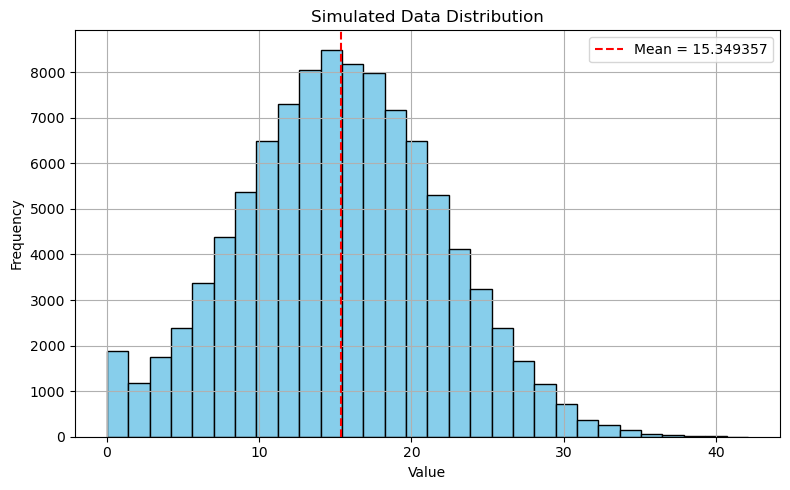

In [287]:
import matplotlib.pyplot as plt
# Optional: Clip to remove negative values (if needed)
simulated_data = np.clip(simulated_data, 0, None)
plt.figure(figsize=(8, 5))
plt.hist(simulated_data, bins=30, color='skyblue', edgecolor='black')
plt.axvline(15.349357, color='red', linestyle='--', label=f'Mean = {15.349357}')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [289]:
from scipy import stats

# Example: Compare target_share between Aries and Leo
group1 = zodiac_final[zodiac_final["zodiac_sign"] == "Aries"]["target_share"]
group2 = zodiac_final[zodiac_final["zodiac_sign"] == "Leo"]["target_share"]

# Run an independent t-test (assumes equal variances by default)
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

return p_value

NameError: name 'zodiac_final' is not defined

In [279]:
import numpy as np
#td_share
simulated_data_2 = np.random.normal(loc=15.396819	, scale=8.296268, size=100000)

NameError: name 'mean' is not defined

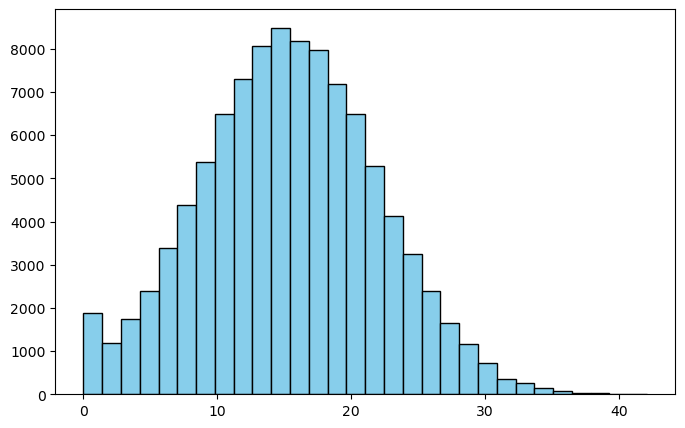

In [281]:
import matplotlib.pyplot as plt
# Optional: Clip to remove negative values (if needed)
simulated_data_2 = np.clip(simulated_data, 0, None)
plt.figure(figsize=(8, 5))
plt.hist(simulated_data_2, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean}')
plt.title("Simulated Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()